# Final Project

# FRA 503: Deep Reinforcement Learning

**จัดทำโดย**
1. อนวัช อนุสุเรนทร์ 65340500067
2. ชัญญาภัค ทรัพย์สวัสดิ์กุล 65340500067

## project overview

### Goal
งานนี้มีเป้าหมายเพื่อเปรียบเทียบประสิทธิภาพของการเรียนรู้ 3 แบบ คือ Model free , Model base , Hybrid โดยใช้โมเดลดังนี้ 

1. MAPPO (Model-Free), 
2. Mamba-2 (Pure Model-Based) 
3. Dyna (Hybrid: MAPPO + Mamba-2) 

ในสภาพแวดล้อมแบบ Single Agent และ Multi Agent

### Analysis
วิเคราะห์ข้อดี-ข้อจำกัด ของ Model-Free และ Model-Based และวิเคราะห์ว่า Hybrid (Dyna) ที่ใช้ทั้ง real และ imagined rollout สามารถลด variance ของ policy gradient และเพิ่ม sample efficiency ได้ดีกว่าแนวทางเดี่ยว


### Environment
#### 1. Flappy Bird
ใช้วิเคราะห์ความสามารถในการเรียนรู้ของ Single-Agent

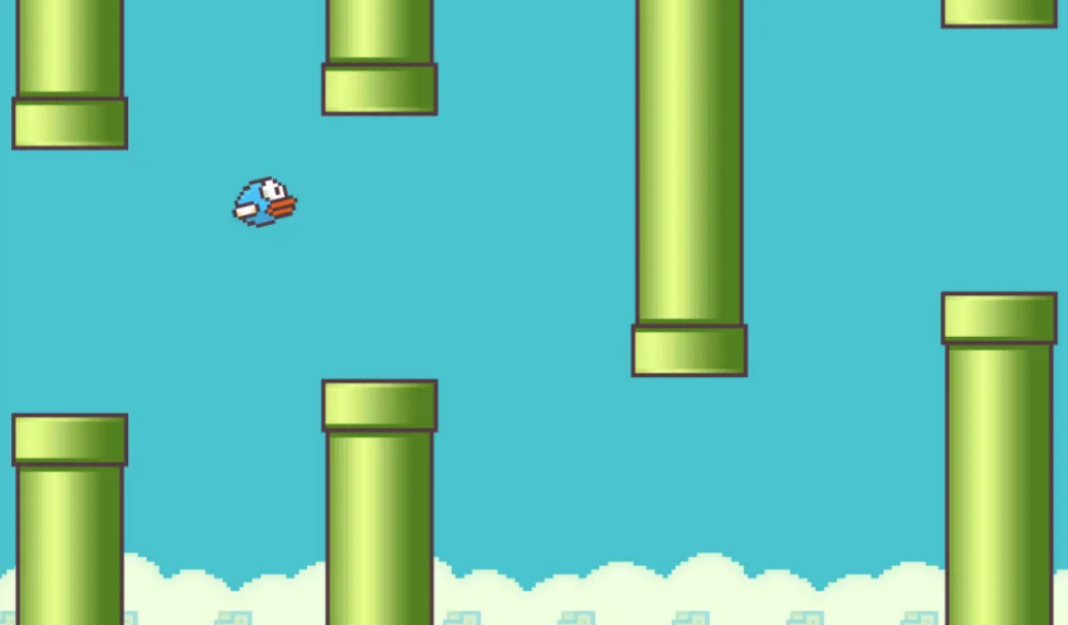

#### 2. Multi-Agent Particle Environment (Simple Spread)
ใช้ศึกษาพฤติกรรมของ Multi-Agent ใน task แบบ Coordination

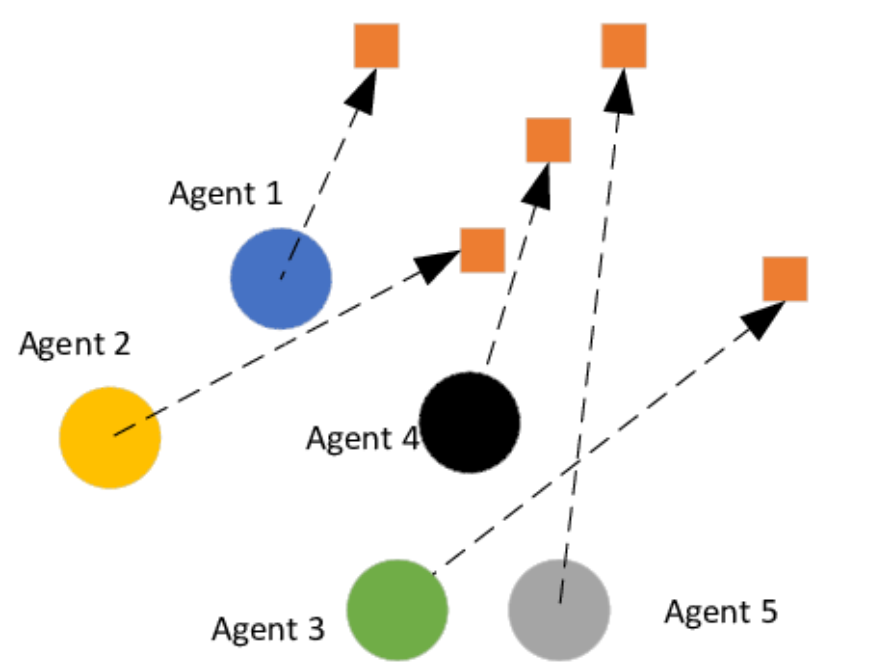

## Scopes

### Scope of Environment
#### 1. Flappy Bird (Single-Agent)
1. ใช้ environment สำเร็จที่พัฒนาด้วย Gymnasium
2. จำกัด observation เป็น 2 แบบ
    - LIDAR-based >> 180 directional distance readings
    - Game-state-based >> pipe positions, player position, velocity, rotation
3. ใช้ random pattern of seed

#### 2. Multi-Agent Particle Environment (MPE)
1. ใช้ centralized vector-based observation
2. ใช้ Agent ไม่เกิน 6 ตัว
3. ฝึกแบบ cooperative task เท่านั้น
4. ไม่ใช้ environment ที่มี competitive หรือ adversarial interaction

## Problem formulation

### Objective 
เปรียบเทียบประสิทธิภาพของ Algorithm 
MAPPO (Model-Free)
MAMBA-2 (Pure Model-Based)
DYNA (MAPPO + MAMBA-2) (Hybrid)

### Research Question
การนำ world model มาสร้าง imagined rollout เพื่อช่วยในการฝึก policy agent สามารถช่วยเพิ่ม sample efficiency และ performance ได้ดีกว่าการเรียนรู้แบบ model-free เพียงอย่างเดียวหรือไม่?

### Experimental 

#### Environment
1. Single-Agent Flappy Bird
2. Multi-Agent Particle Environment (MPE)

#### Evaluation metrics 
1. Average Reward
2. Coordination Score
3. Sample Efficiency
4. AUC (Area Under the Learning Curve)

### Key Focus
- วิเคราะห์ข้อดี-ข้อจำกัดของการใช้ model-based และ hybrid approach
- ศึกษาผลของการใช้ imagined data ต่อการอัปเดต policy ในระบบ Multi-Agent System

## Techniques

## Techniques

### 1. PPO (Proximal Policy Optimization)
- ใช้อัลกอริธึม policy gradient ที่มีการ clip objective เพื่อลดปัญหา policy shift ที่รุนแรงเกินไป
- มีความเสถียรในการเรียนรู้และเป็น baseline ที่นิยมใช้ใน multi-agent RL
- ทำงานแบบ model-free โดยเรียนรู้จาก reward จริงโดยตรง
PPO จะเลือก update เฉพาะกรณีที่การเปลี่ยนแปลงไม่เกินช่วง [1−ϵ, 1+ϵ] เพื่อลด variance และทำให้เรียนรู้ได้เสถียรขึ้น

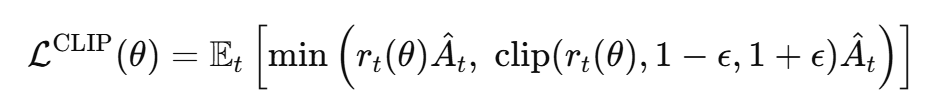



### 2. Dyna
- เป็น hybrid ระหว่าง model-based และ model-free RL
- ใช้ world model สร้าง imagined rollout เพื่อเพิ่ม data efficiency
- ใช้ reward จริงจาก environment ในการ regularize policy ช่วยลดปัญหา model bias
- ได้เปรียบใน task ที่ environment มีความไม่แน่นอนระดับปานกลาง

Dyna ใช้การอัปเดต policy จากทั้ง real transition และ imagined transition โดยมี world model ทำนาย transition ล่วงหน้าโดยมีลำดับการทำงานดังนี้
1. เรียน world model

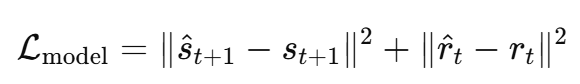

โดย 

𝑠^t+1: state ที่ทำนายโดย model

𝑠t+1: state จริงจาก environment

r^t :reward ที่ทำนาย

rt : reward จริงตามลำดับ

2. สร้าง rollout จาก model

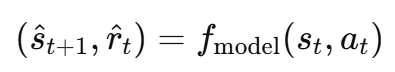

3.  ใช้ PPO update จาก rollout

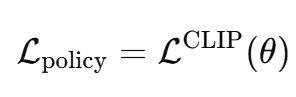


### 3. Mamba (Model-based RL using SSM)

Mamba เป็น fully recurrent model ที่ไม่มี attention เหมือน Transformer แต่ยังสามารถเรียนรู้ลำดับข้อมูลยาว ๆ ได้อย่างมีประสิทธิภาพ ทั้งในด้าน เวลา และ หน่วยความจำ
- ใช้ Mamba2 ซึ่งเป็น SSM-based sequence model แทน Transformer ในการเรียนรู้ dynamics ของ environment
- เหมาะกับลำดับข้อมูลที่มีความต่อเนื่อง (smooth temporal structure)
- ข้อจำกัดคือไม่เหมาะกับ environment ที่ stochastic หรือมีการเปลี่ยนแปลงแบบไม่ต่อเนื่องสูง

Mamba ใช้ world model แบบ Selective State Space Model (SSM) เพื่อเรียนรู้ dynamics ของ environment โดยมีสมการ

Dynamical Equation ของ SSM คือ

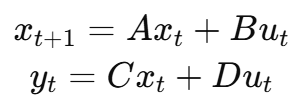


xt : hidden state ของระบบ ณ เวลาที่ 

ut: input (เช่น action)

yt: output (เช่น reward หรือ state ถัดไปที่ทำนาย)

A,B,C,D: พารามิเตอร์ที่เรียนรู้ได้ของ SSM





## Experiment Design
**วัตถุประสงค์**
1. เพื่อวัดว่าการใช้โมเดลแบบ Model-free (MAPPO), Model-based (Mamba-2), และ brid (Dyna: PPO+Mamba2)ให้ผลลัพธ์แตกต่างกันอย่างไรในสภาพแวดล้อมที่มีความซับซ้อนแตกต่างกัน
2. เพื่อเปรียบเทียบลักษณะการเรียนรู้ของอัลกอริธึมทั้งสาม ผ่านกราฟค่า reward ต่อ episode ว่าแต่ละโมเดลมีพฤติกรรมการเรียนรู้อย่างไร

**ตัวแปรควบคุม**
1. Episode: 5000 
2. Learning Rate: 1e-4
3. hidden_dim: 256
4. Random Seed: 42 
5. Environment Version: ใช้ environment ที่มี config เหมือนกัน
6. Observation Space & Action Space: ขนาดและชนิดเหมือนกัน

**Evaluation Metrics**
1.  Average Episodic Reward (ค่าเฉลี่ย reward ต่อ episode)
2.  Sample Efficiency (จำนวน step ที่ใช้ก่อนจะได้ผลลัพธ์ดี)
3.  Convergence Speed (จำนวน episode ก่อน model คงที่)


### Experment 1 : Single Agent (Flappy Bird)
**วัตถุประสงค์**
1. เพื่อประเมินความสามารถของ Model-free, Model-based และ Hybrid ใน environment ที่มีลักษณะ sequential และ deterministic
2. เพื่อดูว่า hybrid model (Dyna) จะได้เปรียบใน task ที่ต้องใช้ memory จาก sequence ยาวหรือไม่

#### ผลการทดลอง

กราฟที่ 1 กราฟเปรียบเทียบระหว่าง model base(PPO) กับ Hybrid (Dyna(Mamba2 + PPO)) ประกอบไปด้วย
- กราฟ Maxstep ที่สามารถบอกความไวในการไปถึง Maxstep (Agent ตัวไหนเรียนรู้ได้เร็วกว่า)
- กราฟ Avg Reward แสดงคะแนนที่ Agent ทำได้ 

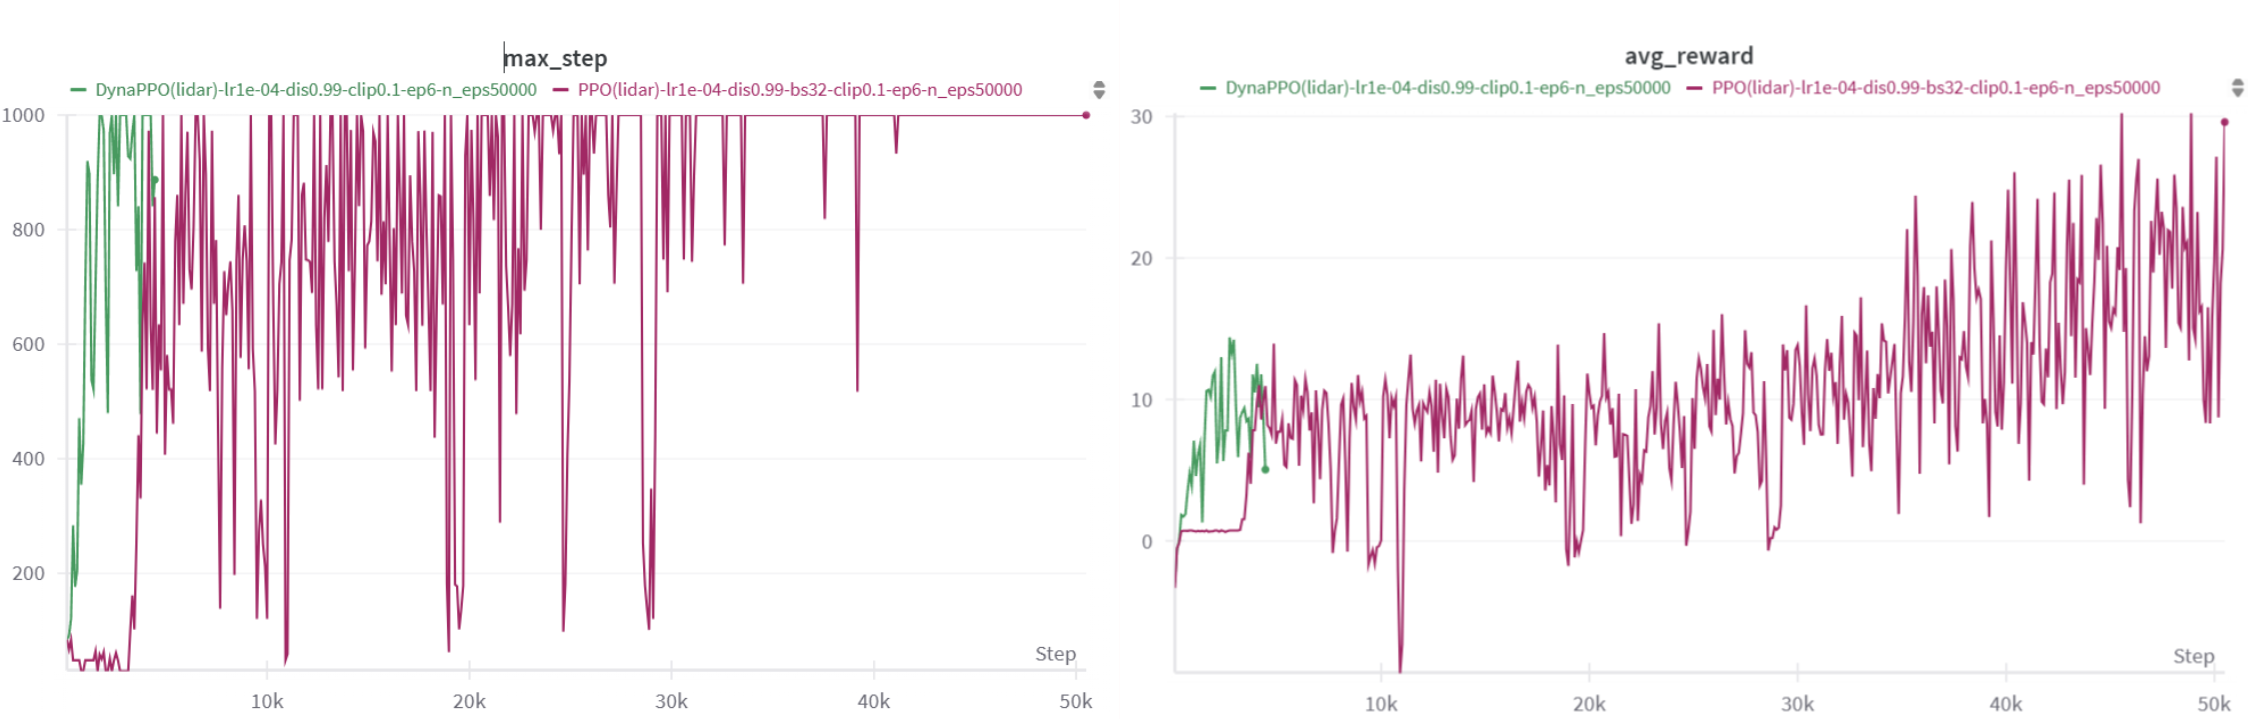

กราฟที่ 2 กราฟ Mamba 

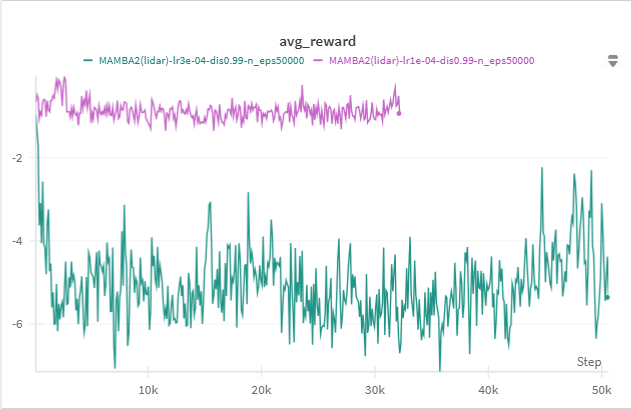


#### วิเคราะห์ผลการทดลอง
จากกราฟที่ 1 แสดงให้เห็นว่า Dyna มีการเรียนรู้ที่รวดเร็วกว่า PPO แบบธรรมดา แต่เมื่อเวลาผ่านไป PPO ก็สามารถเรียนรู้ให้สามารถไปถึง Maxstep ได้เช่นเดียวกันและเมื่อได้ Avg Reward ประมาณ 10-20 flappy bird ก็จะสามารถเล่นเกมได้ไปเรื่อยๆ แต่กลับกันจากกราฟที่ 2 จะเห็นว่าการใช้ Mamba เป็น world model ในการเรียนรู้เชิงลำดับ agent ไม่สามารถเรียนรู้พฤติกรรมที่เหมาะสมได้เลย โดย reward เฉลี่ยยังคง ติดลบตลอดช่วงการฝึก ซึ่งแสดงถึงความล้มเหลวของ Mamba ในการเข้าใจ dynamics ของเกม Flappy Bird อาจเกิดจากสาเหตุคือ ในเกม flappy bird มีการตัดสินใจที่ไวเกินไปทำให้ ทำให้ inductive bias ของ SSM ที่ออกแบบมาเพื่อจับ long-range temporal structure ไม่มีประโยชน์ และ การตายจากการชนท่อเป็น event ที่ไม่ต่อเนื่องและเกิดขึ้นจาก threshold เล็กมาก (เช่น ตกเพียง 1 pixel) ซึ่งทำให้ world model อย่าง Mamba ยากต่อการเรียนรู้ transition แบบนี้ด้วย kernel-based update

### Experiment 2: MPE - 3 Agents (Fixed Landmark , Random Landmark) แบบ ratio = 1 
การตั้งค่า ratio = 1 คือการตั้งค่าให้ Agent ไม่มีการแชร์ Reward ร่วมกันเน้นการทำให้ตัวเองได้ Reward สูงสุด ซึ่งจะทำให้ Reward รวมของทุก Agent มีค่าสูงเพราะทุกตัวพยายามทำคะแนนให้ได้เยอะๆ
**วัตถุประสงค์ ของ Fixed Landmark**
1. เพื่อเปรียบเทียบประสิทธิภาพของแต่ละโมเดลใน task ที่ agent ต้องทำงานร่วมกัน (cooperative task) โดยเป็น deterministic Environment
2. เพื่อทดสอบว่า landmark ที่ไม่เปลี่ยนช่วยให้ model-free (MAPPO) เรียนรู้ได้ดีกว่าหรือไม่


**วัตถุประสงค์ ของ Random Landmark**
1. เพื่อประเมินความสามารถของแต่ละโมเดลในการ generalize เมื่อ environment มี stochasticity
2. เพื่อวัดว่า model-based (Mamba) หรือ hybrid (Dyna) สามารถจัดการกับ randomness ได้ดีกว่า model-free หรือไม่

**สมมติฐาน**
1. การใช้ค่า ratio = 1 หรือ Agent แต่ละตัวไม่รวม Reward กันทำให้น่าจะได้ Reawrd สูงทุกตัว ไม่มีตัวไหนเกาะคะแนน Agent ตัวอื่น 
2. การใช้ Fixed Landmark (deterministic environment) ทำให้ Agent จาก MAPPO algorithm(Model free) สามารถเรียนรู้ได้ดีกว่า stochastic environment 
3. การใช้ Mamba(Model base) ไม่สามารถเรียนรู้ได้ดีใน task นี้ โดยเฉพาะในกรณี Random Landmark เนื่องจากMamba มีโครงสร้างที่เหมาะกับลำดับข้อมูลที่ต่อเนื่อง (smooth dynamics) แต่ environment นี้มีความไม่ต่อเนื่องและสุ่มสูง


#### ผลการทดลอง

กราฟที่ 3 การใช้ Model  base อย่างเดียว

โดยที่
- กราฟสีชมพู คือ Fixed Landmark 
- กราฟสีส้ม คือ Random Landmark

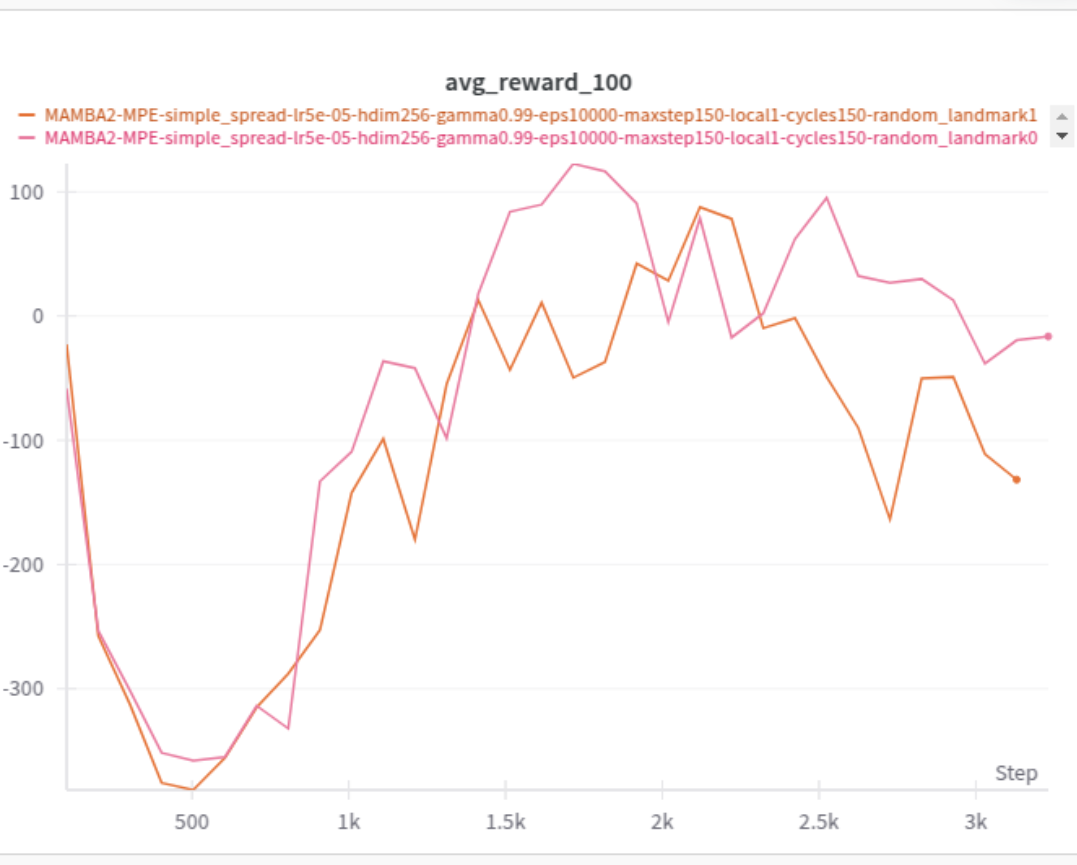 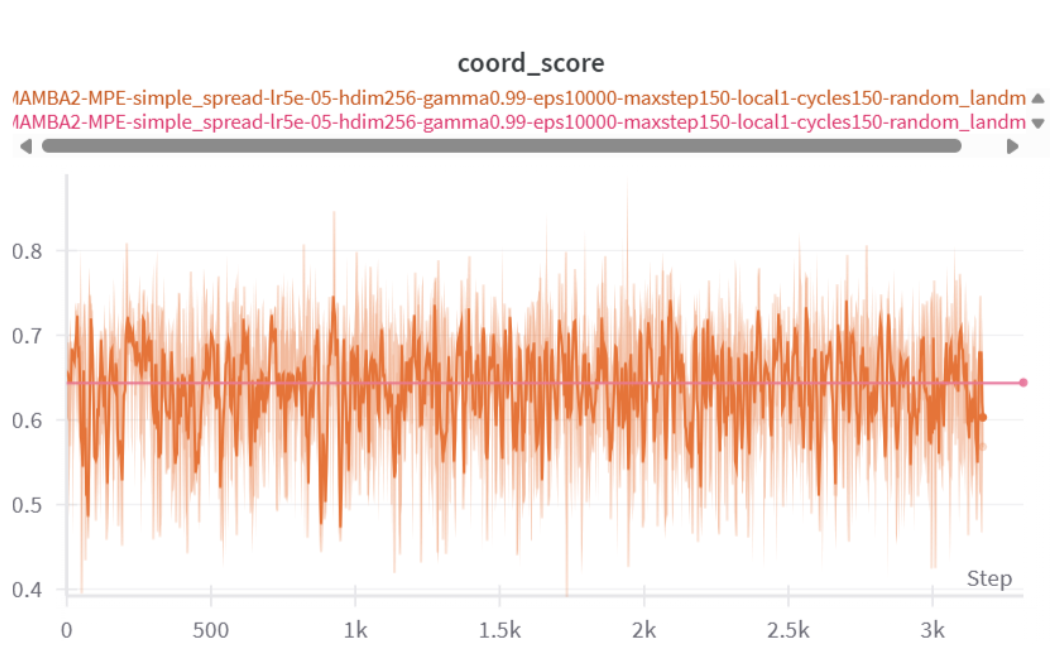

กราฟที่ 4 การใช้ Model free อย่างเดียว

- กราฟสีชมพู คือ Fixed Landmark 
- กราฟสีน้ำเงิน คือ Random Landmark

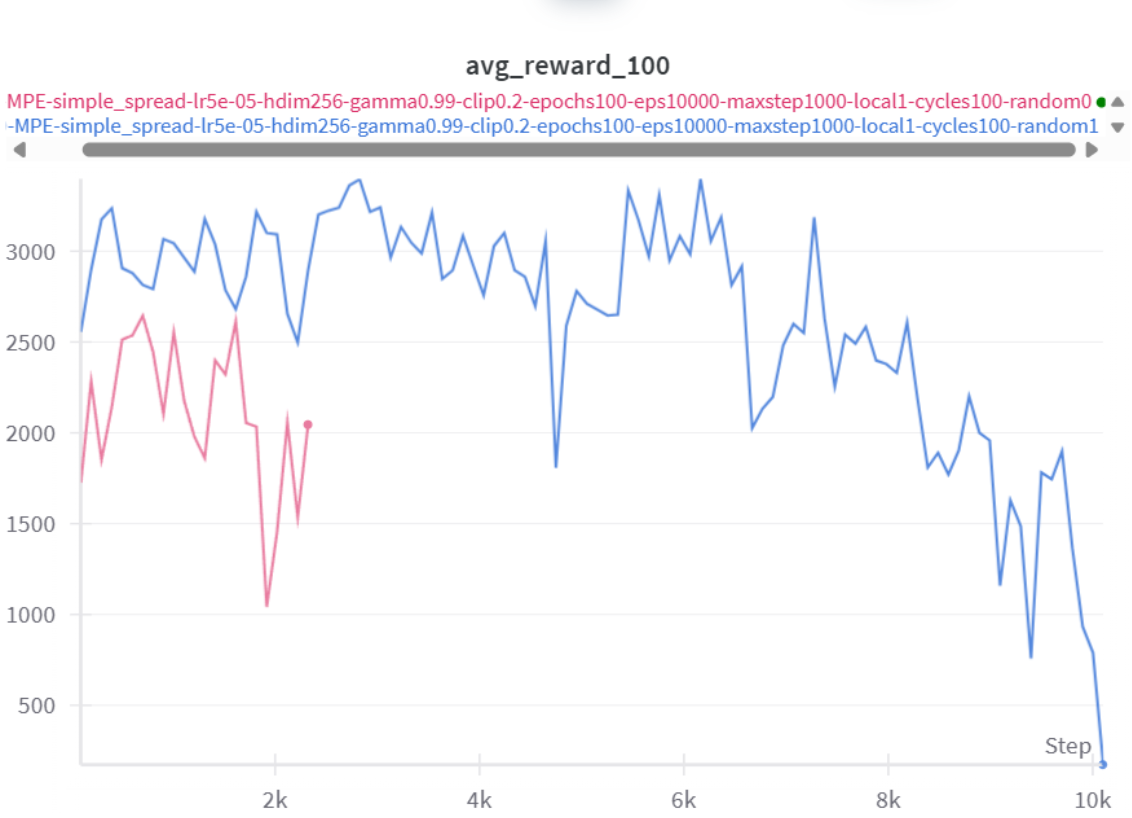 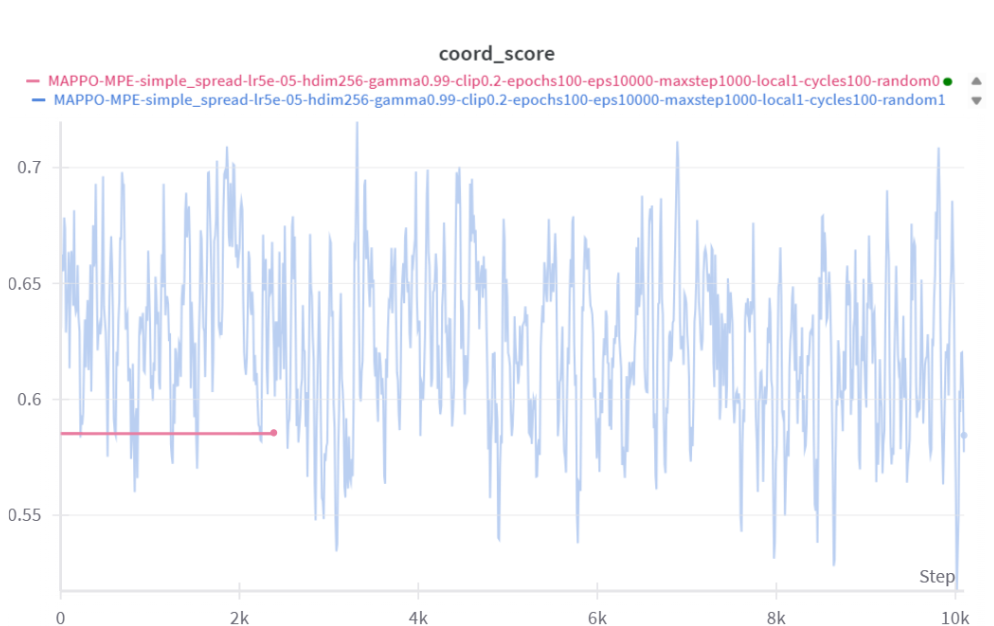

กราฟที่ 5 การใช้ Hybrid model

- กราฟสีแดง คือ Fixed Landmark 
- กราฟเขียว คือ Random Landmark

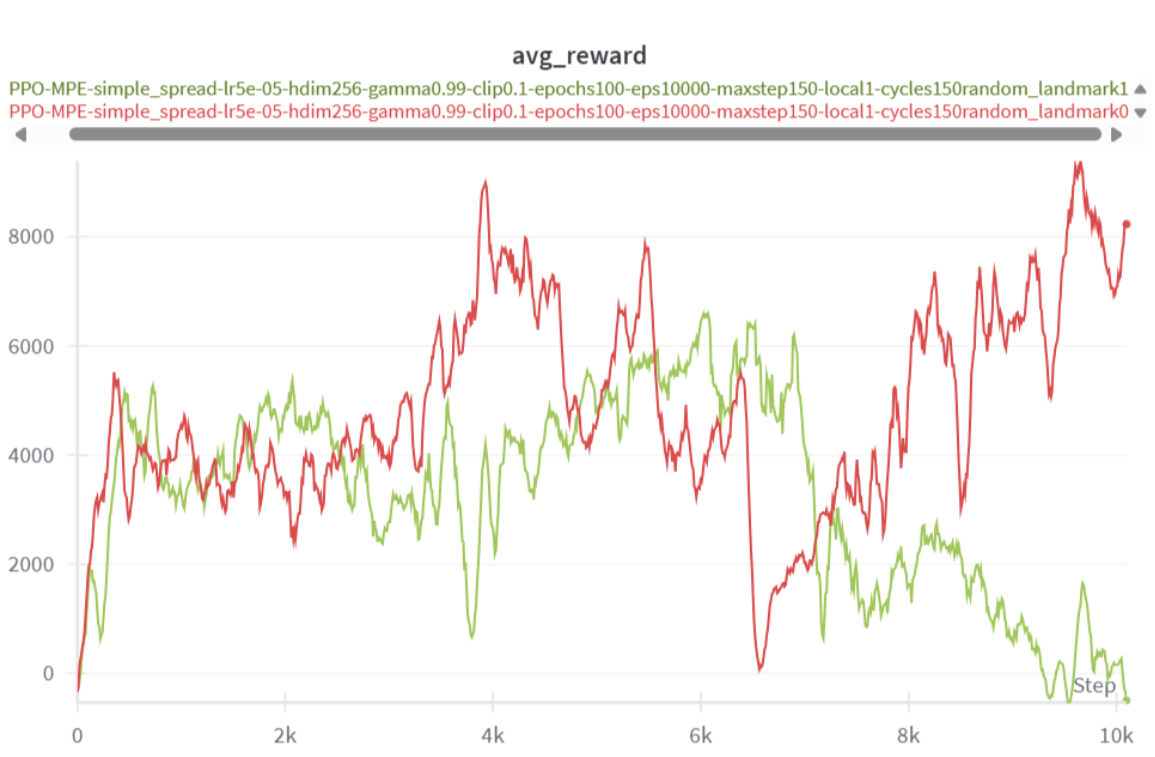 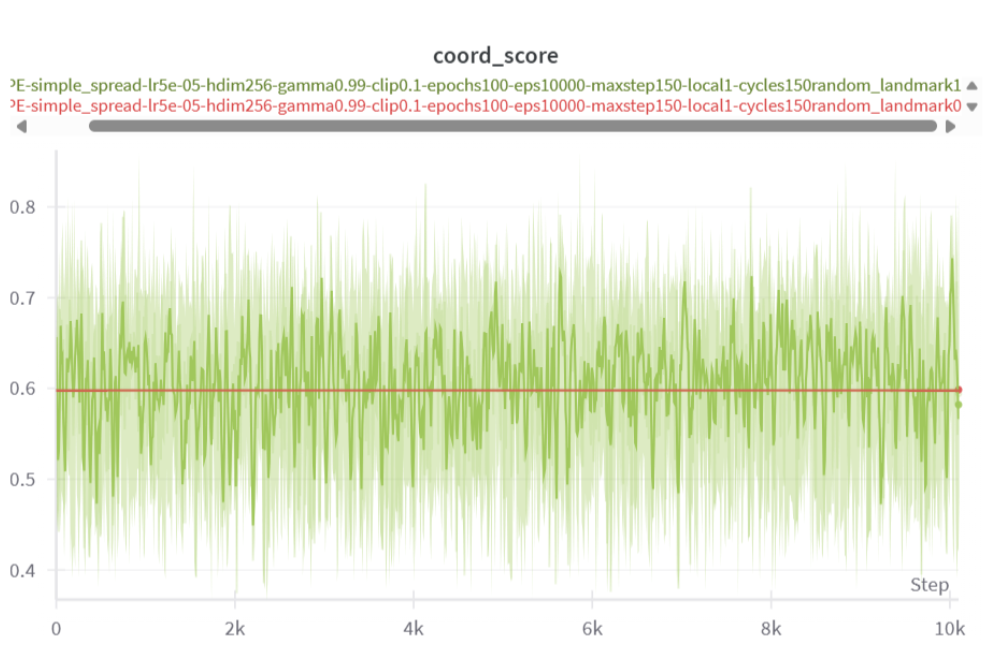

#### วิเคราะห์ผลการทดลอง
จากการทดลองพบว่า จากกราฟที่ 3 จะเห็นว่า Mamba ไม่สามารถเรียนรู้ได้เลย ทั้งในกรณี random และ fixed landmark โดย reward มีค่าแกว่งอยู่ต่ำกว่า 0 เกือบตลอดช่วงการฝึก ซึ่งแสดงว่า world model ของ Mamba ไม่สามารถทำนาย transition ได้แม่นพอ ทำให้ rollout ที่ใช้ train policy มี error สะสมจน policy ได้ไม่ดี นอกจากนี้ Mamba ไม่มี inductive bias ด้าน spatial ทำให้ไม่เข้าใจความสัมพันธ์เชิงตำแหน่งระหว่าง agent กับ landmark ได้ดีพอ โดยเฉพาะใน environment ที่ stochastic ทำให้ policy ไม่สามารถ generalize ได้เลย

จากกราฟที่ 4  PPO แม้จะผันผวนแต่ก็สามารถเรียนรู้ได้ทั้งในกรณี fixed และ random โดยมี reward เฉลี่ยอยู่ในช่วง 2000–3500 ซึ่งถือว่าสามารถเล่น task ได้จริง แต่อาจจะไม่สามารถทำ task ได้สำเร็จ ส่วนนึงอาจจะมาจากการที่ Agent มีการร่วมมือกันน้อยสังเกตุได้จากกราฟ coordinate score

ส่วนผลการทดลองจากกราฟที่ 5 แสดงให้เห็นว่าส่วน Dyna ทำได้ดีที่สุด โดยเฉพาะในกรณี random environment ที่ reward พุ่งสูงต่อเนื่อง ข้อดีของ Dyna คือผสานทั้งฝั่ง model-based และ model-free เข้าด้วยกัน: ฝั่ง model-based ช่วยให้ agent มองเห็นผลลัพธ์ล่วงหน้าใน imagined rollout ทำให้เรียน policy ได้เร็วขึ้น ส่วนฝั่ง model-free ก็ช่วยแก้ปัญหา model bias และทำให้ policy ไม่พังแม้ rollout บางช่วงจะไม่แม่น ส่งผลให้ Dyna เรียนได้ทั้งใน environment ที่ deterministic และ stochastic 

### Experiment 3: MPE - 3 Agents (Fixed Landmark , Random Landmark) แบบ Latio = 0.5  

การตั้งค่า ratio = 0.5 คือการตั้งค่าให้ Agent มีการแชร์ Reward ร่วมกันบ้างระหว่างการทำงาน และ Agent แต่ละตัวก็ยังคงมี Reward เป็นของตัวเอง ซึ่งน่าจะทำให้ Agent ลกการชนกันได้ และสามารถเรียนรู้ร่วมกันได้ดีขึ้น

**วัตถุประสงค์ ของ Fixed Landmark**
1. เพื่อเปรียบเทียบประสิทธิภาพของแต่ละโมเดลใน task ที่ agent ต้องทำงานร่วมกัน (cooperative task) โดยเป็น deterministic Environment
2. เพื่อทดสอบว่า landmark ที่ไม่เปลี่ยนช่วยให้ model-free (MAPPO) เรียนรู้ได้ดีกว่าหรือไม่


**วัตถุประสงค์ ของ Random Landmark**
1. เพื่อประเมินความสามารถของแต่ละโมเดลในการ generalize เมื่อ environment มี stochasticity
2. เพื่อวัดว่า model-based (Mamba) หรือ hybrid (Dyna) สามารถจัดการกับ randomness ได้ดีกว่า model-free หรือไม่

**สมมติฐาน**
1. การใช้ค่า ratio = 0.5 หรือ Agent มีทั้ง reward ของตัวเองและการแชร์ reward ทำให้ Agent น่าจะได้ reward รวมไม่เยอะแต่น่าจะทำให้ Agent สามารถทำ task ได้สำเร็จกว่าแบบที่ Agent task เป็นของตัวเอง
2. การใช้ Fixed Landmark (deterministic environment) ทำให้ Agent จาก MAPPO algorithm(Model free) สามารถเรียนรู้ได้ดีกว่า stochastic environment 
3. การใช้ Mamba(Model base) ไม่สามารถเรียนรู้ได้ดีใน task นี้ โดยเฉพาะในกรณี Random Landmark เนื่องจากMamba มีโครงสร้างที่เหมาะกับลำดับข้อมูลที่ต่อเนื่อง (smooth dynamics) แต่ environment นี้มีความไม่ต่อเนื่องและสุ่มสูง

กราฟที่ 6 การใช้ Model  base อย่างเดียว

โดยที่
- กราฟสีม่วง คือ Fixed Landmark 
- กราฟสีชมพู คือ Random Landmark

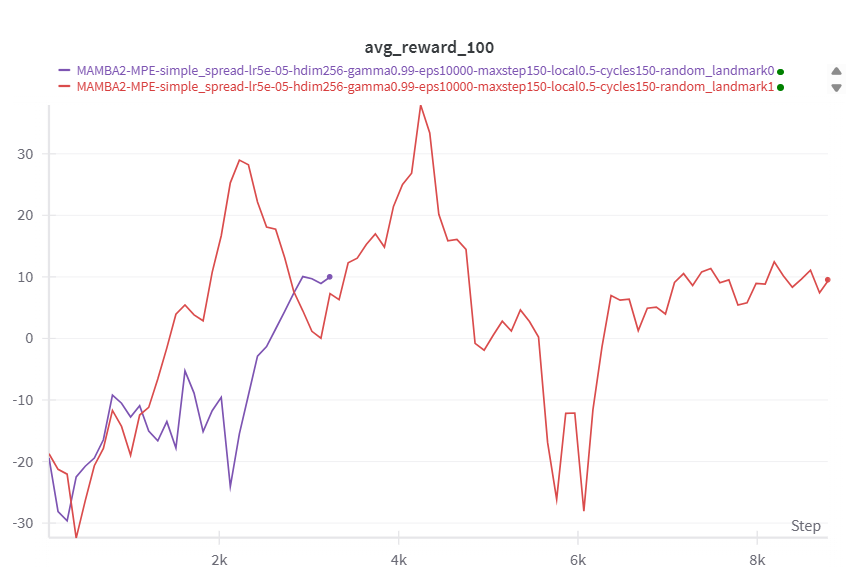
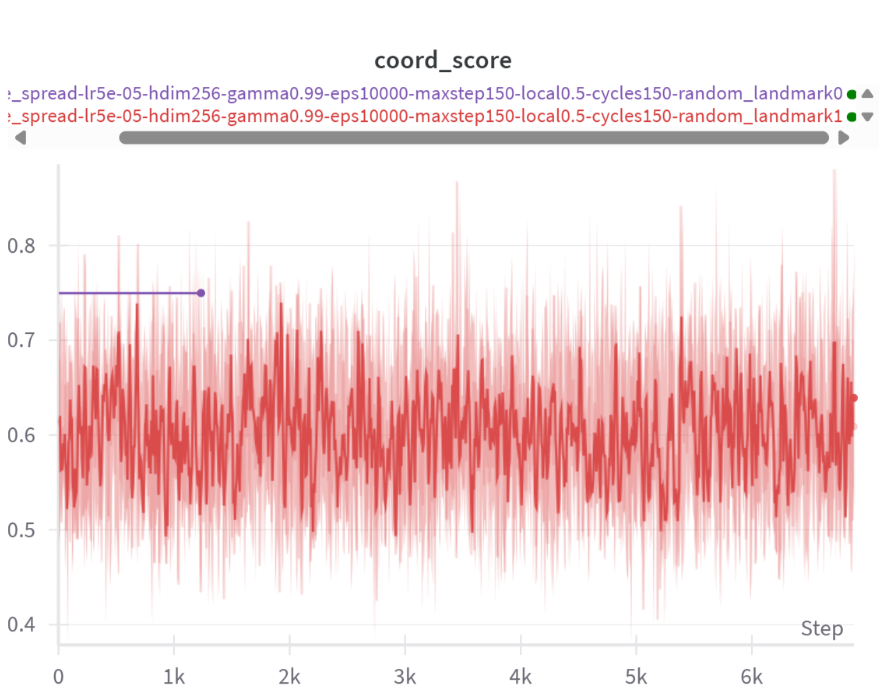

กราฟที่ 7 การใช้ Model free อย่างเดียว

- กราฟสีเขียว คือ Fixed Landmark 
- กราฟสีเทา คือ Random Landmark

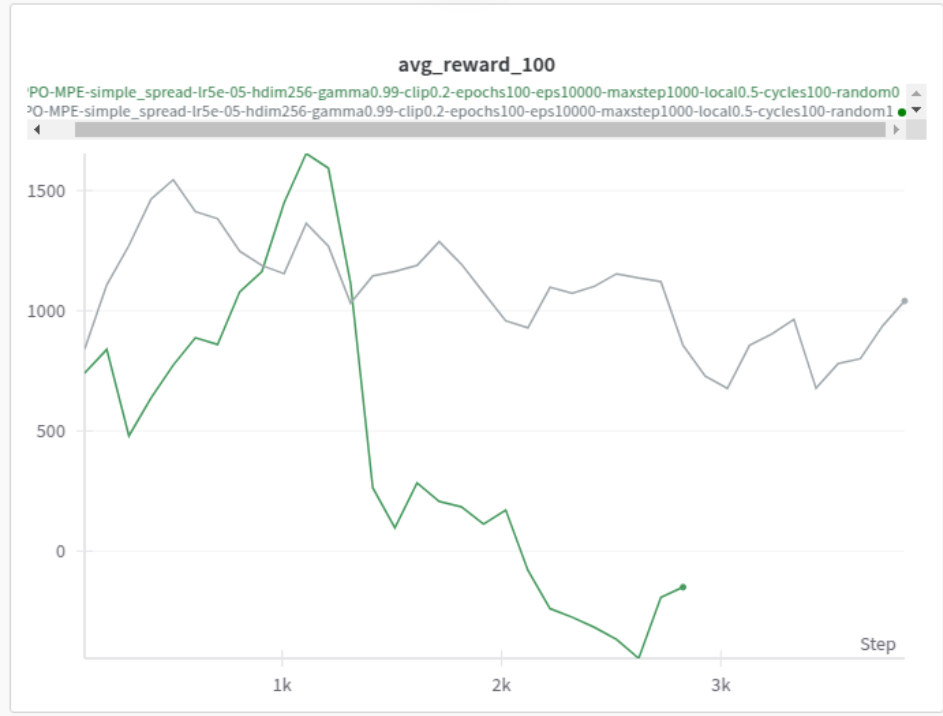
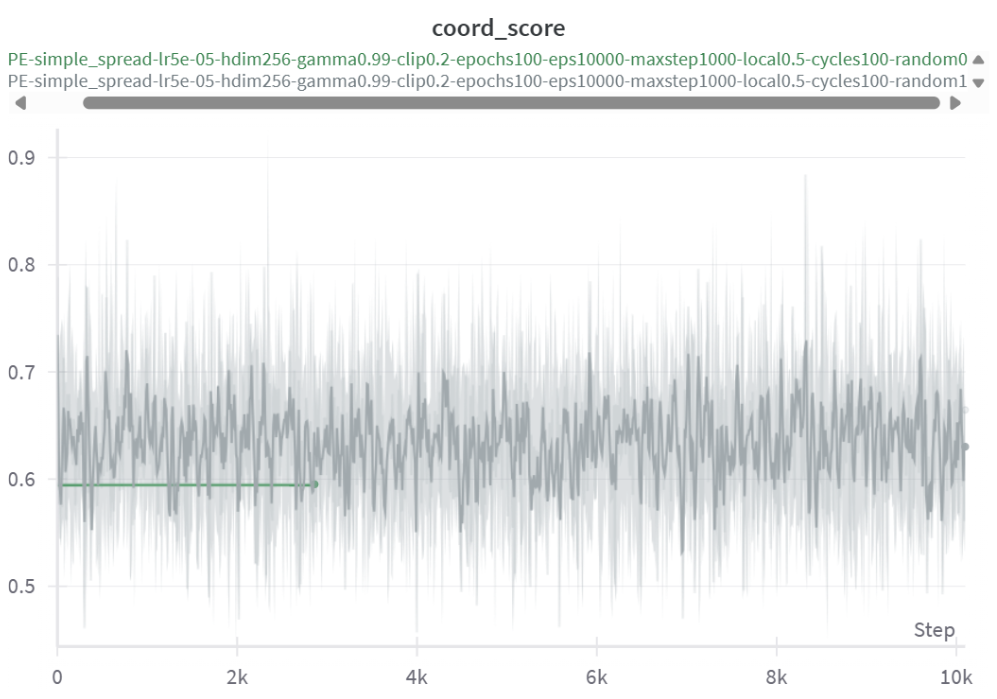


กราฟที่ 8 การใช้ Hybrid model

- กราฟสีเขียว คือ Fixed Landmark 
- กราฟเทา คือ Random Landmark


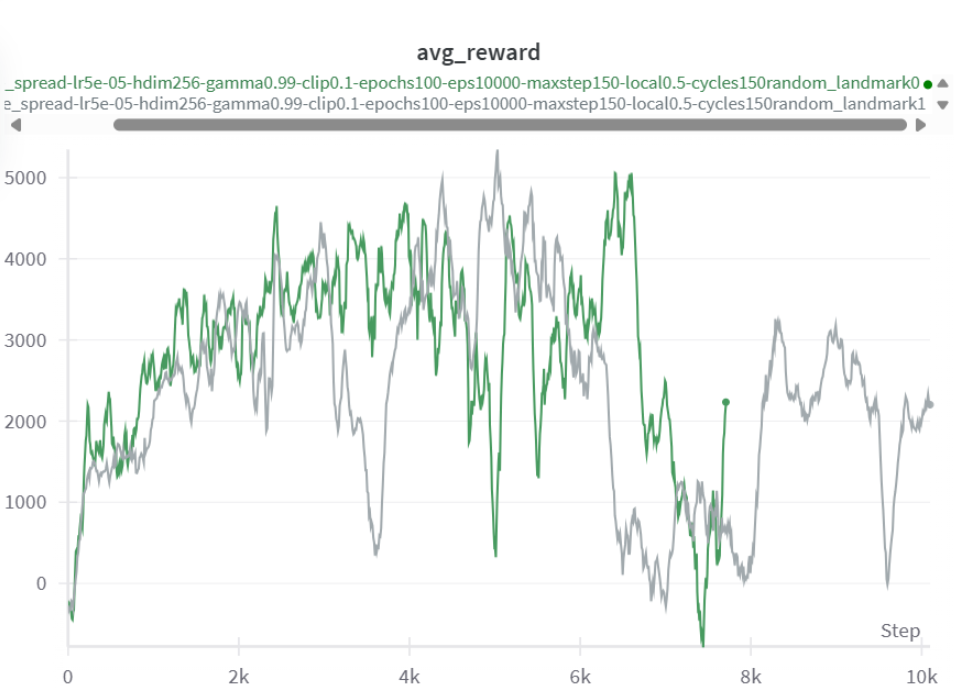
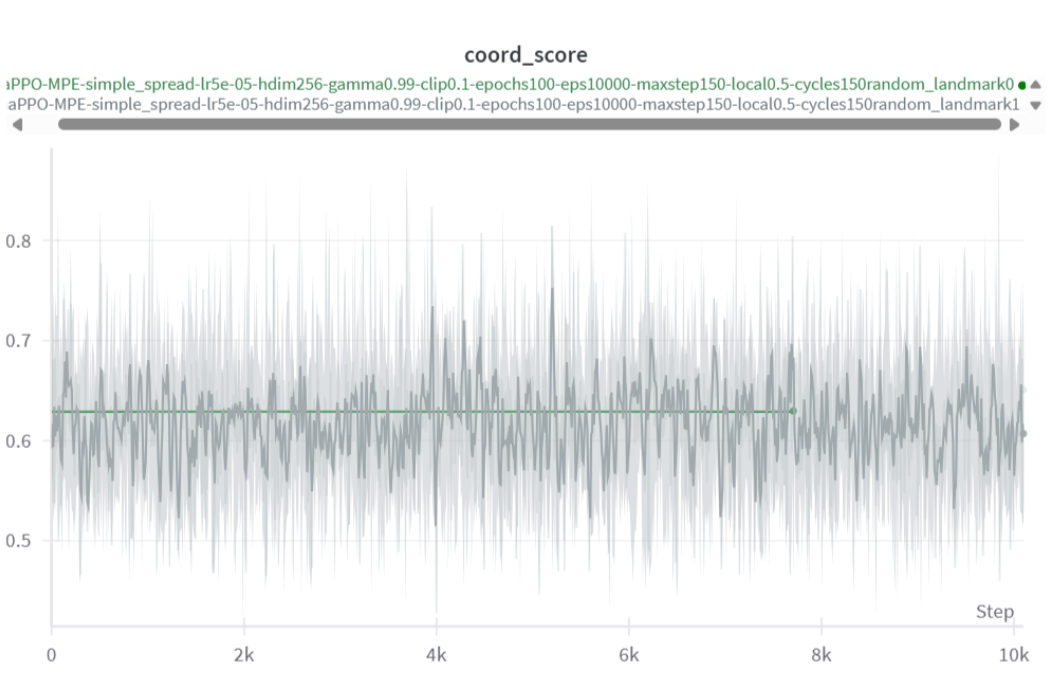

#### วิเคราะห์ผลการทดลอง 

Mamba เรียนรู้ได้ชัดเจนขึ้นเมื่อเริ่มมีการแชร์ reward กับ agent ตัวอื่นสังเกตุได้จากกราฟ coordinate score ที่แกว่งใกล้ศูนย์กลางมากขึ้น โดย Mamba กีขึ้นอย่างชัดเจนโดยเฉพาะใน fixed landmark ที่ reward พุ่งขึ้นสูงกว่า 30 และมีรูปทรงกราฟชัดเจนกว่าในตอน ratio = 1 แสดงว่า sharing reward ทำให้ signal มีความสม่ำเสมอมากขึ้น และช่วยให้ model-based อย่าง Mamba พอจะจับ dynamics ได้บ้าง แต่พอเปลี่ยนเป็น random environment ก็ยังเจอปัญหาเดิมคือ reward ตกและแกว่งหนัก เพราะ rollout ที่ไม่แม่น

PPO ก็ยังมีปัญหาเดิมใน random environment เช่นกัน โดย reward ตกลงเหลือต่ำกว่า 500 และถึงขั้นเข้าใกล้ 0 ในบางช่วง แสดงว่าแม้จะมี reward shared แต่ stochasticity ก็ยังรบกวน policy learning ได้มาก ส่วน fixed environment ก็ยังพอเรียนรู้ได้แต่ก็ไม่ค่อยนิ่ง ทำให้ performance โดยรวมไม่เสถียรเท่าเดิม

Dyna ยังคงเป็นตัวที่ทำได้ดีที่สุด โดยสามารถดัน reward ขึ้นไปถึงเกือบ 5000 ในทั้งสองกรณี แต่กราฟจะเห็นว่าช่วง random จะมีความผันผวนมากขึ้นกว่าตอน ratio = 1 โดยเฉพาะหลัง 6k step ที่ reward ดรอปลงอย่างชัดเจน จุดแข็งของ Dyna ยังอยู่ที่การใช้ model-based rollout เร่ง learning และใช้ reward จริงมาช่วย regularize policy ซึ่งยิ่งมี reward ที่แชร์ระหว่าง agent ก็ยิ่งช่วยลด variance ของ signal แต่ข้อจำกัดก็เริ่มชัดเจนขึ้นเมื่อ environment มี randomness สูง

## Simulation

### Flappy Bird Best

ใช้ PPO หรือ Dyna ได้ผลลัพธืสุดท้ายเหมือนกัน 

In [1]:
from IPython.display import HTML

HTML("""
<video width="640" height="360" controls>
  <source src="Video/dynappo_flappy.mp4" type="video/mp4">
</video>
""")


### Flappy Bird ฺBad

Mamba จากที่เห็นคือไม่สามารถเรียนรู้ได้เลยตั้งแต่ครั้งแรก แค่ท่อแรกก็ไม่ผ่านแล้ว เพราะการใช้ Lidar น่าจะทำให้ได้รับข้อมูลสั้นและไวเกินไป ยังไม่ทันสามารถนำมาใช้ Predict ได้ 

In [2]:
from IPython.display import HTML

HTML("""
<video width="640" height="360" controls>
  <source src="Video/dynappo_flappy.mp4" type="video/mp4">
</video>
""")

### MPE Best

Dyna ได้ผลลัพธ์ที่ดีที่สุด จาก Simulation จะเห็นว่า Agent สามารถเข้าหา Landmark โดยแยกกัน 1 Agent 1 Landmark ได้ ค่อนข้างดี แต่ยังไม่เกาะติด Landmark ขนาดนั้น แสดงให้เห็นว่า Agent ยังคงตามหาสิ่งที่ดีกว่าบ้าง 

In [3]:
from IPython.display import HTML

HTML("""
<video width="640" height="360" controls>
  <source src="Video/MPE_DynaPPO.mp4" type="video/mp4">
</video>
""")

## Summary 

จากผลการทดลองทั้งหมด ทั้งใน Flappy Bird, MPE ratio = 1 และ ratio = 0.5 จะเห็นว่ากลุ่ม model-free อย่าง PPO เรียนรู้ได้ดีใน environment ที่เสถียร เช่น fixed landmark หรือ Flappy Bird ที่ dynamics ไม่เปลี่ยน แต่พอเจอ stochasticity เช่น landmark สุ่มหรือ environment ที่มีความไม่แน่นอนสูง reward จะดรอปลงชัดเจน บางช่วงถึงขั้น collapse ส่วน model-based อย่าง Mamba แทบจะเรียนไม่ขึ้นเลยในทุกกรณี โดยเฉพาะ Flappy Bird ที่ dynamics ไม่ต่อเนื่องและ state เปลี่ยนแบบกระโดด ทำให้ rollout ที่ทำนายจาก model เพี้ยนหนัก พอใช้ train policy จริงก็พังอยู่ดี แม้ใน MPE ratio = 0.5 ที่มีการแชร์ reward จะช่วยให้ Mamba เรียนขึ้นมาบ้าง แต่ก็ยังแกว่งและไม่สามารถ maintain performance ได้ ส่วนที่ทำได้ดีที่สุดในทุก task คือ Dyna ที่เป็น hybrid เพราะได้ข้อดีของทั้งสองฝั่ง ใช้ model-based rollout เพื่อเร่งการเรียนช่วงต้น แล้วใช้ reward จริงจาก environment มาช่วยพยุง policy ให้ไม่พังเวลา rollout มี error โดยเฉพาะใน fixed landmark ที่ Dyna ไปได้ไกลสุด และแม้ใน random environment ที่มี stochasticity สูงก็ยังรักษา reward ไว้ได้ แค่มีความผันผวนมากขึ้นบ้าง แต่โดยรวมแล้วยังแข็งแรงกว่าโมเดลอื่น ๆ ชัดเจน

### Model-Free (PPO)
เรียนรู้ได้ดีใน environment ที่เสถียรและ deterministic เช่น fixed landmark หรือ Flappy Bird
แต่พอเจอ stochasticity สูง เช่น landmark เปลี่ยนตำแหน่งหรือ randomness เยอะ performance ดรอปและไม่เสถียร

### Model-Based (Mamba)
แทบเรียนไม่ขึ้นในทุกกรณี เพราะ rollout จาก model มี error สะสมเยอะ
ไม่เหมาะกับ task ที่ dynamics ไม่ต่อเนื่องหรือ stochastic มาก เช่น Flappy Bird หรือ landmark ที่สุ่ม

### Hybrid (Dyna)
ทำได้ดีที่สุดในทุก task เพราะผสานข้อดีของทั้งสองฝั่ง
rollout จาก model ช่วยเร่งการเรียนช่วงต้น และ reward จริงจาก environment ช่วยพยุง policy ไม่ให้พัง
จึง robust ทั้งในกรณี deterministic และ stochastic